<a href="https://colab.research.google.com/github/bmulas1535/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself
import pandas as pd

# Lets bring in the data, and assign it to variable df
df = pd.read_csv('https://raw.githubusercontent.com/bmulas1535/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

# I don't need the index column included in the csv, So lets drop
# the first column completely for all views of this objects
df.drop(columns = 'Unnamed: 0', inplace=True)

# Now we can print the first 5 lines to ensure we have it working!
df.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [0]:
#!pip install pandas==0.23.4 ## Needed for pd.cut(), commented out for now.

In [0]:
# I want to see relationships in the data, so lets look at it a couple 
# different ways.

# First, lets import our plotting libraries.

import matplotlib.pyplot as plt
import seaborn as sns


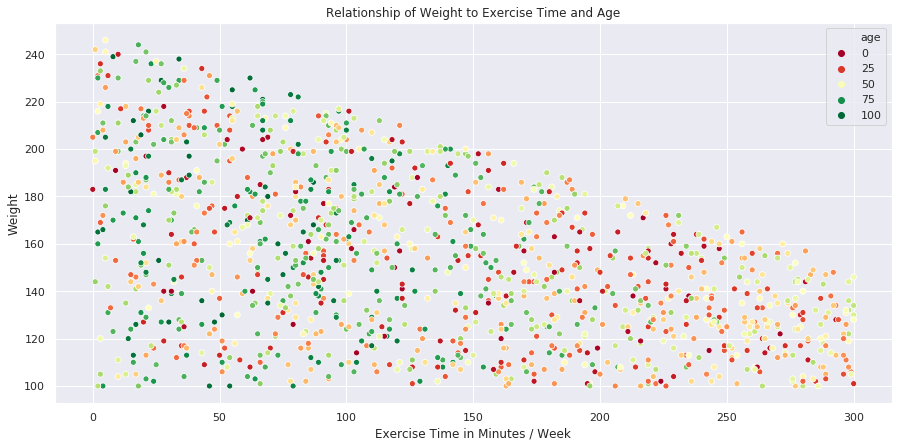

In [0]:
dims = (15, 7)  # Define the shape and size of the plot

data_plot = df # Define what's being plotted

fig, ax = plt.subplots(figsize=dims) # Set our figure and subplot

# This is our plot
sns.scatterplot(ax=ax, data=df, x = 'exercise_time', y = 'weight', hue = 'age', palette = 'RdYlGn')

# Set a title, and x / y labels for cleanliness.
plt.title('Relationship of Weight to Exercise Time and Age')
plt.xlabel('Exercise Time in Minutes / Week')
plt.ylabel('Weight')

# Show the plot!
plt.show();

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Assignment Answers:

1. What are the variable types in the data?
  * We can see continuous variables in the form of exercise time and weight. Exercies time appears to be an independant variable, while weight does appear to be more dependant, and influenced by other factors.
  * Age is a discrete variable, and also appears to influence other variables such as weight.

2. What are the relationships between the variables?
  * Exploring the data has shown a clear relationship between age and Exercise time, with regard to weight. The data shows that younger, more active persons are inclined to have a healthier weight, while older, more sedentary participants were heavier, on average.

3. Which relationships are "real", and which are spurious?
  * I'm not sure about spurious, but age is definitely confounding. It introduces bias and increases variance.



## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)